In [11]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Step 1: Fetch the webpage content
url = 'https://stockanalysis.com/list/bursa-malaysia/'
headers = {'User-Agent': 'Mozilla/5.0'}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.content, 'html.parser')

# Step 2: Parse the stock data
stock_data = []
table = soup.find('table')  # Locate the table containing the stock data
for row in table.find_all('tr')[1:]:  # Skip the header row
    columns = row.find_all('td')
    if len(columns) > 1:  # Ensure the row contains data
        no = columns[0].text.strip()
        symbol = columns[1].text.strip()
        company_name = columns[2].text.strip()
        market_cap = columns[3].text.strip()
        stock_price = columns[4].text.strip()
        revenue = columns[6].text.strip()
        stock_data.append([no, symbol, company_name, market_cap, stock_price, revenue])

# Step 3: Save the data to a CSV file
df = pd.DataFrame(stock_data, columns=['No', 'Symbol', 'Company Name', 'Market Cap', 'Stock Price', 'Revenue'])
df.to_csv('bursa_malaysia_stocks.csv', index=False)

In [12]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Step 1: Fetch the webpage content
url = 'https://stockanalysis.com/list/bursa-malaysia/'
headers = {'User-Agent': 'Mozilla/5.0'}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.content, 'html.parser')

# Step 2: Parse the stock data
stock_data = []
table = soup.find('table')  # Locate the table containing the stock data
for row in table.find_all('tr')[1:]:  # Skip the header row
    columns = row.find_all('td')
    if len(columns) > 1:  # Ensure the row contains data
        no = columns[0].text.strip()
        symbol = columns[1].text.strip()
        company_name = columns[2].text.strip()
        market_cap = columns[3].text.strip()
        stock_price = columns[4].text.strip()
        change = columns[5].text.strip()
        revenue = columns[6].text.strip()
        stock_data.append([no, symbol, company_name, market_cap, stock_price, change, revenue])

# Step 3: Save the data to a CSV file
df = pd.DataFrame(stock_data, columns=['No', 'Symbol', 'Company Name', 'Market Cap', 'Stock Price', '% Change', 'Revenue'])
df  # Display the first few rows of the DataFrame

,No,Symbol,Company Name,Market Cap,Stock Price,% Change,Revenue
0,1,MAYBANK,Malayan Banking Berhad,118.39B,9.78,-0.20%,28.16B
1,2,PBBANK,Public Bank Berhad,86.52B,4.460,0.23%,14.28B
2,3,TENAGA,Tenaga Nasional Berhad,79.39B,13.62,-,65.70B
3,4,CIMB,CIMB Group Holdings Berhad,78.20B,7.33,1.10%,20.86B
4,5,IHH,IHH Healthcare Berhad,60.27B,6.82,-,24.72B
...,...,...,...,...,...,...,...
495,496,DUTALND,DutaLand Berhad,218.50M,0.270,-1.82%,408.81M
496,497,METRO,Metro Healthcare Berhad,215.36M,0.220,-2.22%,47.53M
497,498,SKYGATE,Skygate Solutions Berhad,214.56M,0.690,-,65.76M
498,499,HEXRTL,Hextar Retail Berhad,214.54M,0.460,2.22%,61.76M


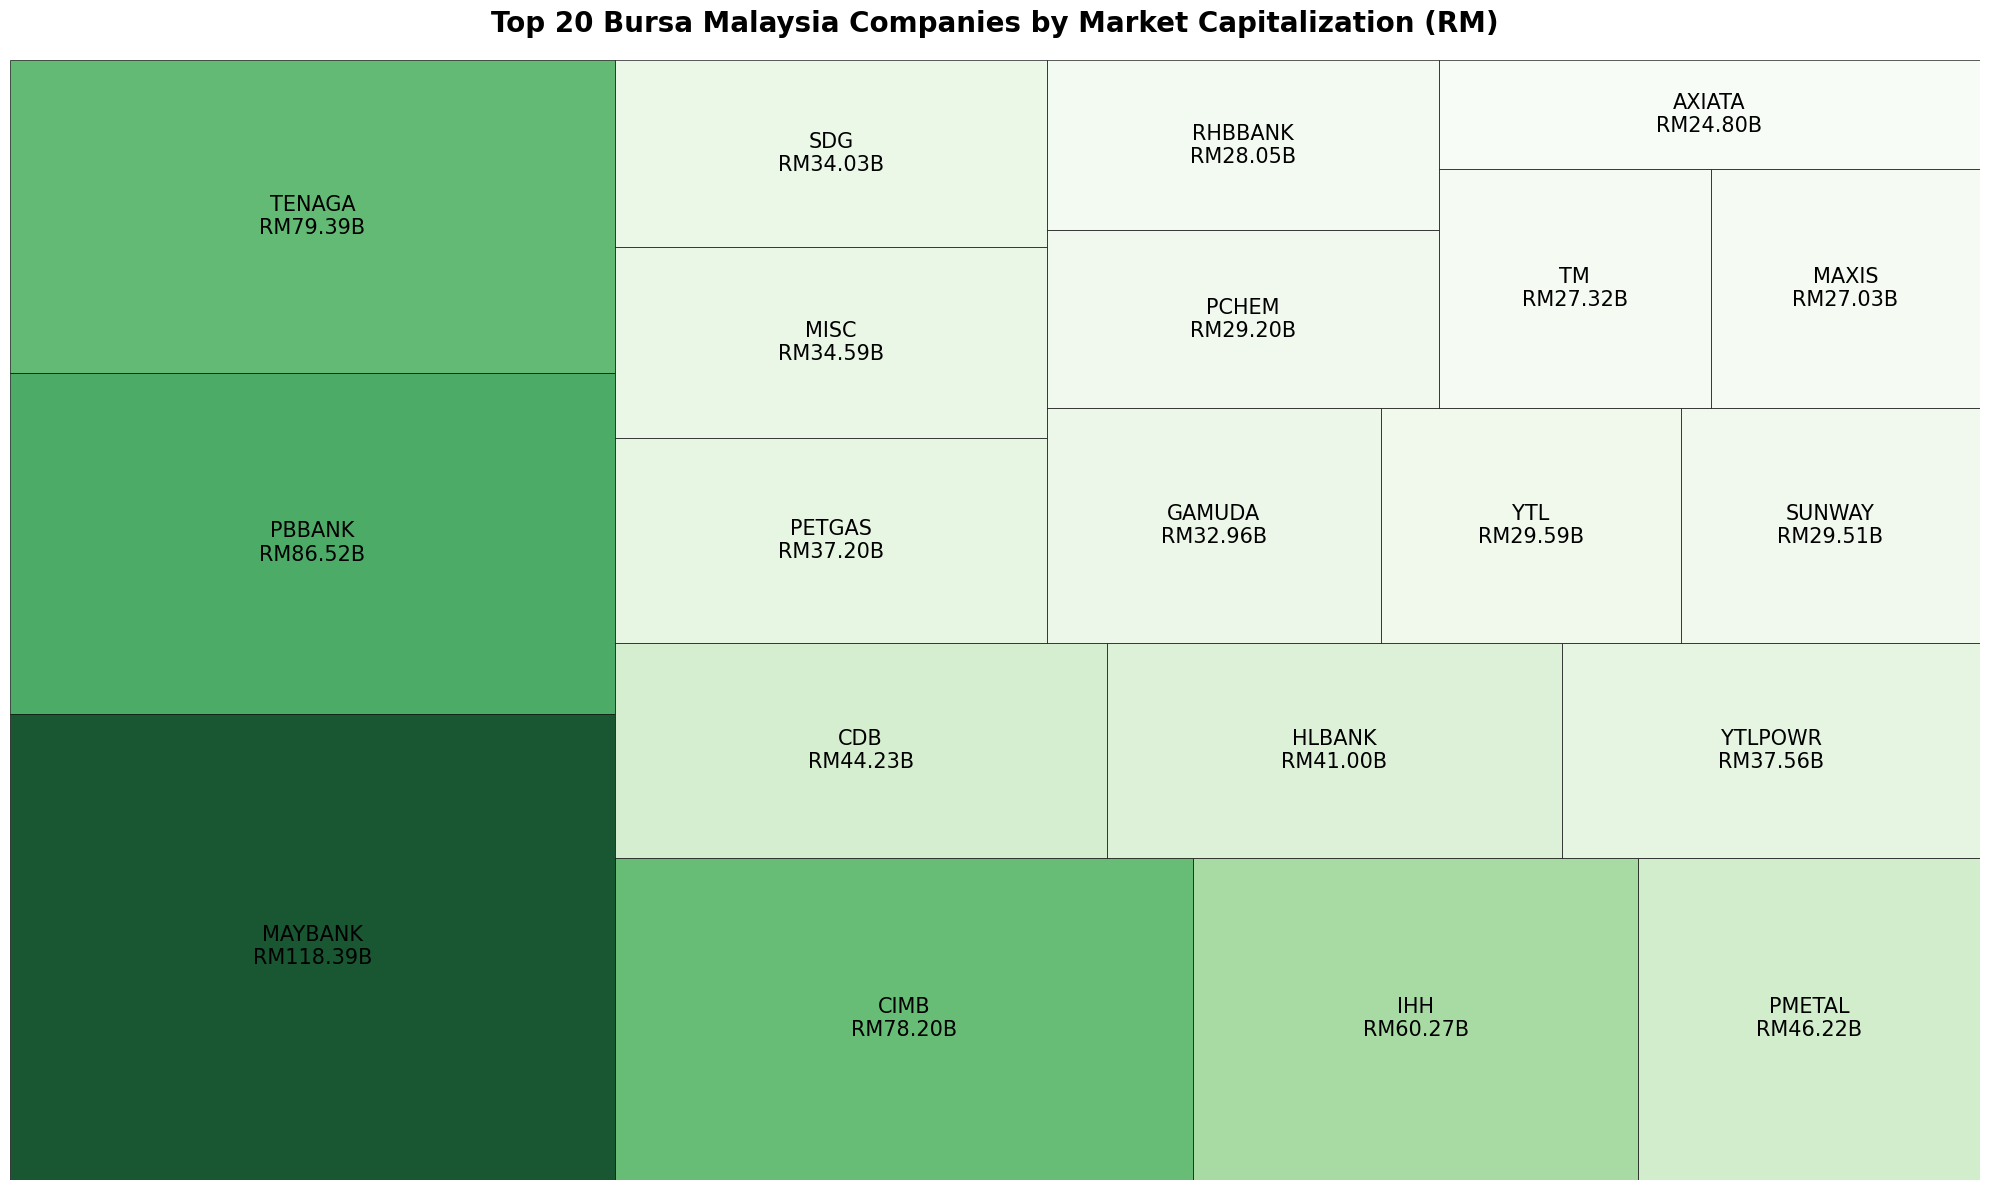

In [13]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import squarify
import seaborn as sns

# Step 1: Fetch the webpage content
url = 'https://stockanalysis.com/list/bursa-malaysia/'
headers = {'User-Agent': 'Mozilla/5.0'}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.content, 'html.parser')

# Step 2: Parse the stock data
stock_data = []
table = soup.find('table')  # Locate the table containing the stock data
for row in table.find_all('tr')[1:]:  # Skip the header row
    columns = row.find_all('td')
    if len(columns) > 1:  # Ensure the row contains data
        no = columns[0].text.strip()
        symbol = columns[1].text.strip()
        company_name = columns[2].text.strip()
        market_cap = columns[3].text.strip()
        stock_price = columns[4].text.strip()
        change = columns[5].text.strip()
        revenue = columns[6].text.strip()
        stock_data.append([no, symbol, company_name, market_cap, stock_price, change, revenue])

# Step 3: Save the data to a CSV file
df = pd.DataFrame(stock_data, columns=['No', 'Symbol', 'Company Name', 'Market Cap', 'Stock Price', '% Change', 'Revenue'])

# Clean and convert Market Cap to numeric values
# Remove 'M' and 'B' suffixes and convert to millions
def clean_market_cap(value):
    if 'B' in value:
        return float(value.replace('B', '').replace('RM', '').strip()) * 1000
    elif 'M' in value:
        return float(value.replace('M', '').replace('RM', '').strip())
    return 0

df['Market Cap (M)'] = df['Market Cap'].apply(clean_market_cap)

# Get top N companies (e.g., top 20)
top_n = 20
df_top = df.nlargest(top_n, 'Market Cap (M)')

# Prepare data for treemap
sizes = df_top['Market Cap (M)'].values
labels = []
for i, row in df_top.iterrows():
    name = row['Symbol']
    cap = row['Market Cap (M)']
    if cap >= 1000:
        label = f"{name}\nRM{cap/1000:.2f}B"
    else:
        label = f"{name}\nRM{cap:.0f}M"
    labels.append(label)

# Normalize colors
norm = plt.Normalize(min(sizes), max(sizes))
colors = plt.cm.Greens(norm(sizes))

# Create figure and axis
fig, ax = plt.subplots(figsize=(20, 12))

# Plot treemap
squarify.plot(
    sizes=sizes,
    label=labels,
    alpha=0.9,
    color=colors,
    ax=ax,
    text_kwargs={'fontsize':15, 'fontweight':'light', 'color':'black'},
    pad=False,
    bar_kwargs={'edgecolor': 'black', 'linewidth': 0.5}
)

ax.set_title(f'Top {top_n} Bursa Malaysia Companies by Market Capitalization (RM)', 
             fontsize=20, fontweight='bold', pad=20)
ax.axis('off')

plt.tight_layout()
plt.show()

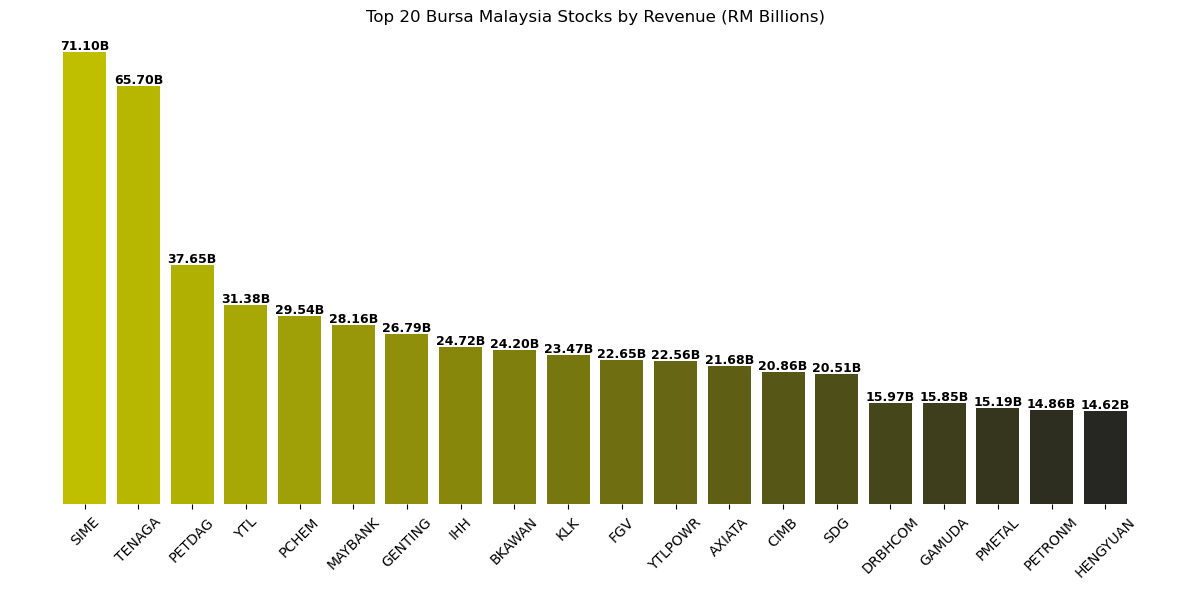

In [14]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Fetch the webpage content
url = 'https://stockanalysis.com/list/bursa-malaysia/'
headers = {'User-Agent': 'Mozilla/5.0'}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.content, 'html.parser')

# Step 2: Parse the stock data
stock_data = []
table = soup.find('table')  # Locate the table containing the stock data
for row in table.find_all('tr')[1:]:  # Skip the header row
    columns = row.find_all('td')
    if len(columns) > 1:  # Ensure the row contains data
        no = columns[0].text.strip()
        symbol = columns[1].text.strip()
        company_name = columns[2].text.strip()
        market_cap = columns[3].text.strip()
        stock_price = columns[4].text.strip()
        change = columns[5].text.strip()
        revenue = columns[6].text.strip()
        stock_data.append([no, symbol, company_name, market_cap, stock_price, change, revenue])

# Step 3: Create DataFrame
df = pd.DataFrame(stock_data, columns=['No', 'Symbol', 'Company Name', 'Market Cap', 'Stock Price', '% Change', 'Revenue'])

# Step 4: Clean and convert Revenue to numeric values
def clean_revenue(value):
    value = value.replace('RM', '').strip()
    if 'B' in value:
        return float(value.replace('B', '').strip()) * 1e9  # Convert billions to numbers
    elif 'M' in value:
        return float(value.replace('M', '').strip()) * 1e6  # Convert millions to numbers
    elif 'K' in value:
        return float(value.replace('K', '').strip()) * 1e3  # Convert thousands to numbers
    try:
        return float(value)
    except:
        return 0

df['Revenue (Num)'] = df['Revenue'].apply(clean_revenue)

# Step 5: Get top 10 companies by revenue
df_top = df.nlargest(20, 'Revenue (Num)')

# Step 6: Create bar chart
plt.figure(figsize=(12, 6))
colors = sns.color_palette("dark:y_r", n_colors=len(df_top))
bars = plt.bar(df_top['Symbol'], df_top['Revenue (Num)'] / 1e9, color=colors)

# Add text labels on top of each bar
for bar, revenue in zip(bars, df_top['Revenue (Num)']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2,
             height,
             f'{revenue / 1e9:.2f}B',
             ha='center',
             va='bottom',
             fontsize=9,
             fontweight='bold')

# Customize the chart
plt.yticks([])
sns.despine(left=True, bottom=True)
plt.grid(False)
plt.title('Top 20 Bursa Malaysia Stocks by Revenue (RM Billions)')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

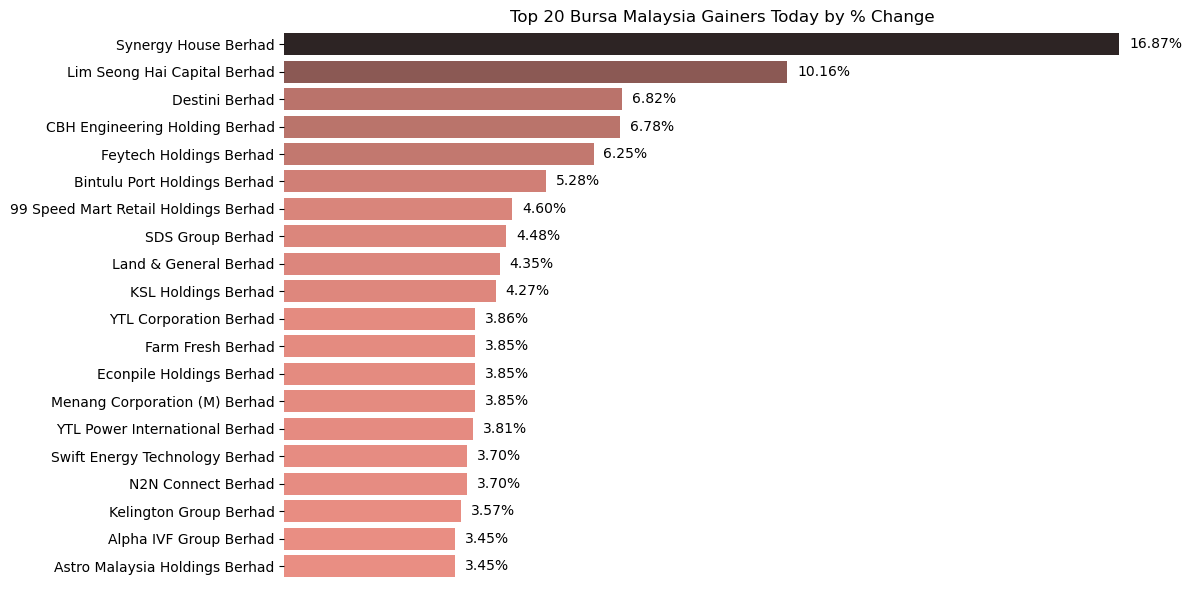

In [15]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Fetch the webpage content
url = 'https://stockanalysis.com/list/bursa-malaysia/'
headers = {'User-Agent': 'Mozilla/5.0'}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.content, 'html.parser')

# Step 2: Parse the stock data
stock_data = []
table = soup.find('table')  # Locate the table containing the stock data
for row in table.find_all('tr')[1:]:  # Skip the header row
    columns = row.find_all('td')
    if len(columns) > 1:  # Ensure the row contains data
        no = columns[0].text.strip()
        symbol = columns[1].text.strip()
        company_name = columns[2].text.strip()
        market_cap = columns[3].text.strip()
        stock_price = columns[4].text.strip()
        change = columns[5].text.strip()
        revenue = columns[6].text.strip()
        stock_data.append([no, symbol, company_name, market_cap, stock_price, change, revenue])

# Step 3: Create DataFrame
df = pd.DataFrame(stock_data, columns=['No', 'Symbol', 'Company Name', 'Market Cap', 'Stock Price', '% Change', 'Revenue'])

# Step 4: Clean and convert % Change to numeric values
def clean_change(value):
    value = value.replace('%', '').strip()
    if value == '-':
        return 0.0
    try:
        return float(value)
    except:
        return 0.0

df['% Change'] = df['% Change'].apply(clean_change)

# Step 5: Filter top 10 highest % Change (positive changes only)
top_20_gainers = df[df['% Change'] > 0].nlargest(20, '% Change')

# Step 6: Create the visualization
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='% Change', y='Company Name', data=top_20_gainers, 
                hue='% Change', palette='dark:salmon_r', dodge=False)

plt.title('Top 20 Bursa Malaysia Gainers Today by % Change')
sns.despine(left=True, bottom=True)
plt.grid(False)
plt.xticks([])
plt.xlabel('')
plt.ylabel('')

# Add data labels with improved formatting
for p in ax.patches:
    width = p.get_width()
    if width > 0:  # Only label positive values
        ax.text(width + 0.2,  # x-position: slightly right of the bar end
                p.get_y() + p.get_height()/2,  # y-position: middle of the bar
                f'{width:.2f}%',  # Formatted text with 2 decimal places
                va='center',  # Vertical alignment
                ha='left',    # Horizontal alignment
                fontsize=10,
                color='black')

plt.tight_layout()
plt.legend().remove()  # Remove legend if not needed
plt.show()